In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

c:\Users\gulmu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

c:\Users\gulmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\gulmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\gulmu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

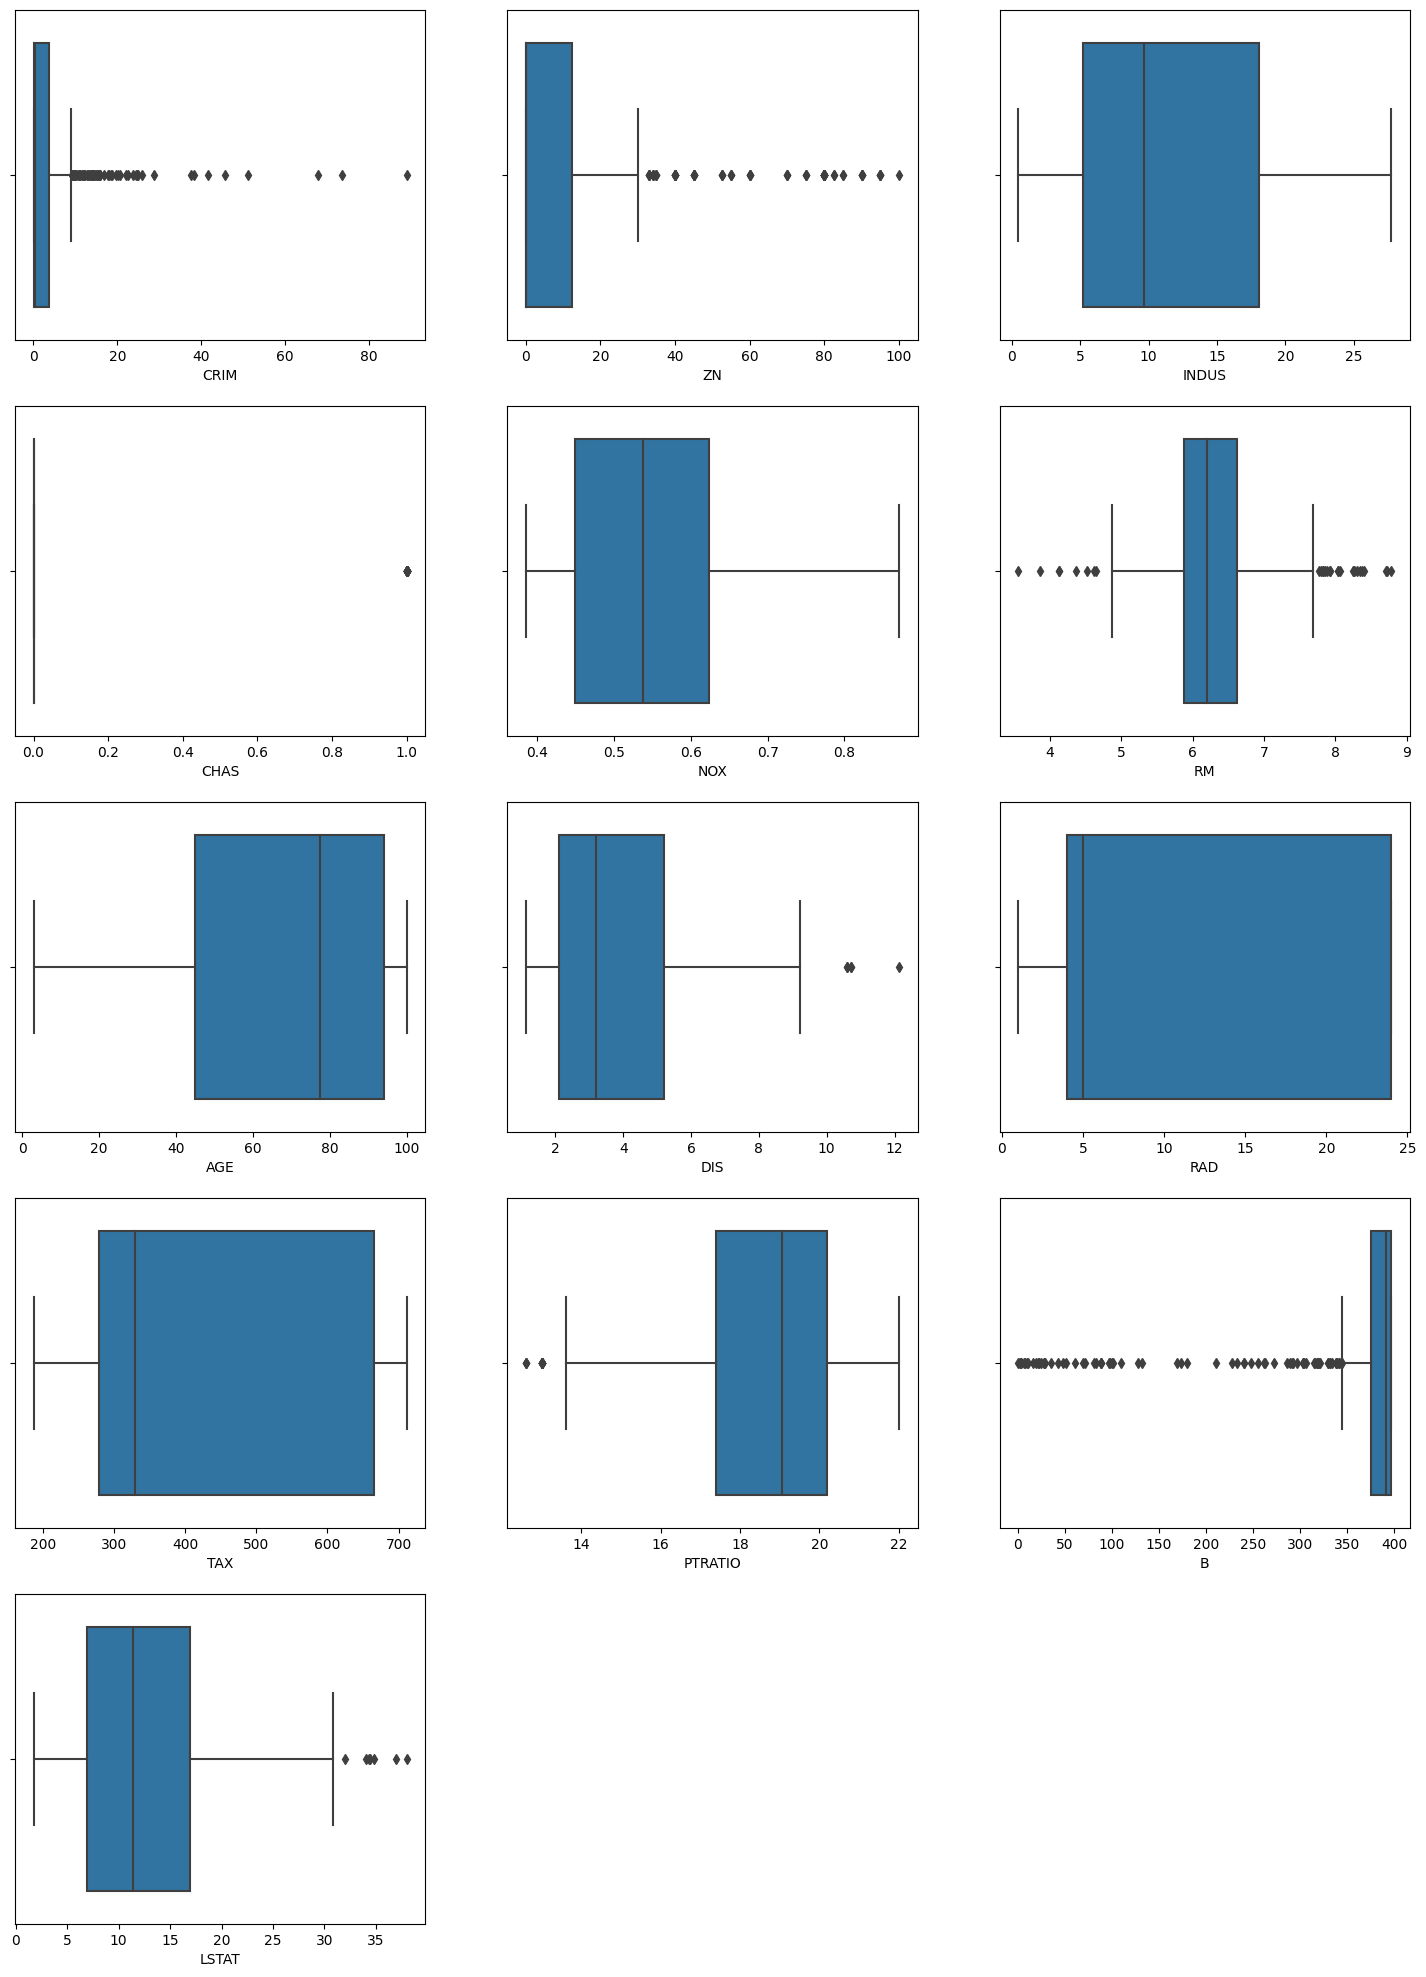

In [5]:
# plotting numerical columns
c = 1
plt.figure(figsize=(18,30))
for i in df:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
    c = c+1
plt.show()

In [6]:
def mod_outlier(df):
    col_vals = df.columns
    df1 = df.copy()
    df = df._get_numeric_data()

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for col in col_vals:
        for i in range(0, len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]

            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]

    for col in col_vals:
        df1[col] = df[col]

        return(df1)

In [7]:
mod_outlier(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [10]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [11]:
# model loop for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in [lr,dt,knn]:  # read all models
    i.fit(X_train, y_train) # fit the model
    pred = i.predict(X_test) # predict the model
    text_score = r2_score(y_test, pred) # r2 score
    train_score = r2_score(y_train, i.predict(X_train)) # r2 score
    if abs(train_score-text_score) <= 0.5:
        print(i)
        print('R2 score is:', r2_score(y_test, pred))
        print('Mean absolute error is:', mean_absolute_error(y_test, pred))
        print('Mean squared error is:', mean_squared_error(y_test, pred))
        print('Root Mean squared error is:', math.sqrt(mean_squared_error(y_test, pred)))
        print('-----------------------------------------------')        

LinearRegression()
R2 score is: 0.7523649554283056
Mean absolute error is: 2.630396306606111
Mean squared error is: 12.124800747337677
Root Mean squared error is: 3.4820684581635777
-----------------------------------------------
DecisionTreeRegressor()
R2 score is: 0.6402987229240669
Mean absolute error is: 2.9352450980392155
Mean squared error is: 17.611830024509807
Root Mean squared error is: 4.196645091559424
-----------------------------------------------
KNeighborsRegressor()
R2 score is: 0.5196479098353745
Mean absolute error is: 3.4702745098039216
Mean squared error is: 23.519180784313725
Root Mean squared error is: 4.849657800743649
-----------------------------------------------


- Linear Regression is Good for Training the Data
- Decission Tree is Good for Both